# Initialisation des listes
Mesures

In [2]:
distance_m = [[-2.4, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.2],
              [-3.3, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3],
              [-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]]

tension_m = [[-79.3, -65.9, -50.08, -34.63, -18.12, 0, 19.60, 35.9, 52.3, 69, 75.2],
             [-78, -70, -58.7, -48, -37.15, -25.15, -12.16, 0, 14.9, 27.15, 38.55, 50.78, 63.6, 75.2],
             [-61.9, -53.63, -47.67, -41.55, -32.84, -25.18, -17.20, -8.28, 0, 10.4, 19.12, 27.65, 35.79, 42.60, 50.62, 59.32, 66.9]]

# Calcul de $U_{acc}$

In [3]:
import numpy as np

a = 0.014
b = 0.024
c = 0.006

def fnorm(z):
    return np.sqrt(1 + np.power((z/a), 2)) - np.abs(z)/a

def V(z):
    return fnorm(z - c/2) - fnorm(z + c/2)

rapp_U_Uacc = 2*V(c/2)/(V(b+c/2) + V(c/2))
print(rapp_U_Uacc)

tension_borne = [612.5, 450, 308.4]
tension_acc = []
for t in tension_borne:
    tension_acc.append(t/rapp_U_Uacc)
    
print(tension_acc)

1.7507100998834668
[349.85803762757183, 257.03855825699156, 176.1570919254582]


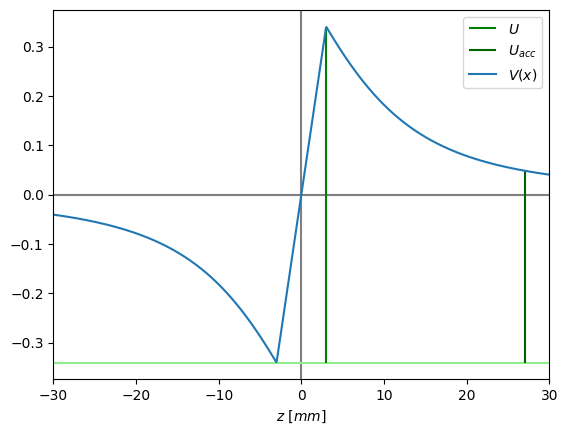

In [4]:
import matplotlib.pyplot as plt

range_1 = np.linspace(-30, 30, 1000)

plt.figure()

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.axhline(y=V(-c/2), color='lightgreen')
plt.vlines(x=c/2*1000, ymin=V(-c/2), ymax=V(c/2), color='green', label=r'$U$')
plt.vlines(x=27, ymin=V(-c/2), ymax=V(b+c/2), color='darkgreen', label=r'$U_{acc}$')

plt.plot(range_1, V(range_1/1000), label=r'$V(x)$')
plt.xlabel(r'$z \ [mm]$')

plt.xlim(-30, 30)
plt.legend()

plt.savefig("tens-norm.pdf")
plt.show()

# Simulation et réalité

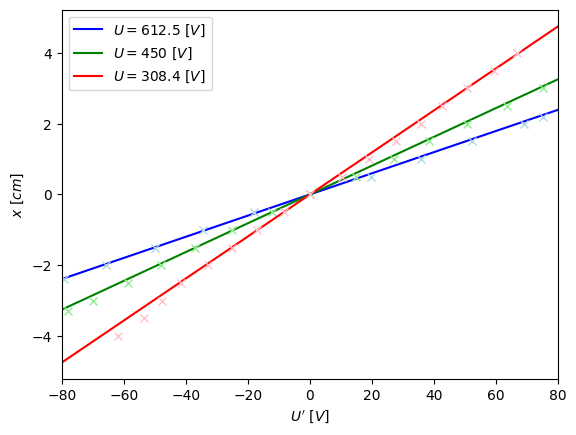

In [5]:
l = 0.115
d = 0.02
s = 0.011

def x_dev(U, U_acc):
    return (l*d)/(2*s)*U/U_acc

test_range = np.linspace(-80, 80, 5000)

plt.figure()

plt.plot(test_range, x_dev(test_range, tension_acc[0])*100, color="blue", label=r"$U = {} \ [V]$".format(tension_borne[0]))
plt.plot(tension_m[0], distance_m[0], color="lightblue", linestyle=" ", marker="x")

plt.plot(test_range, x_dev(test_range, tension_acc[1])*100, color="green", label=r"$U = {} \ [V]$".format(tension_borne[1]))
plt.plot(tension_m[1], distance_m[1], color="lightgreen", linestyle=" ", marker="x")

plt.plot(test_range, x_dev(test_range, tension_acc[2])*100, color="red", label=r"$U = {} \ [V]$".format(tension_borne[2]))
plt.plot(tension_m[2], distance_m[2], color="pink", linestyle=" ", marker="x")

plt.xlabel(r"$U' \ [V]$")
plt.ylabel(r"$x \ [cm]$")

plt.xlim(-80, 80)
plt.legend()

plt.savefig("sim-real.pdf")
plt.show()

# Calcul de l'erreur et des tensions théorique

In [6]:
tension_th = [[], [], []]
erreur = [[], [], []]
erreur_moy = []

def inv_x(x, U_acc):
    return (2*s)/(l*d)*x*U_acc

for i in range(len(distance_m)):
    for j in range(len(distance_m[i])):
        tension_th[i].append(inv_x(distance_m[i][j]/100, tension_acc[i]))
        erreur[i].append(np.abs((tension_th[i][j] - tension_m[i][j]) / tension_th[i][j]) * 100) if tension_th[i][j] != 0 else erreur[i].append(0)
    erreur_moy.append(np.average(erreur[i]))
erreur_moy.append(np.average(erreur[0] + erreur[1] + erreur[2]))

print(tension_th)
print(erreur)
print(erreur_moy)

[[-80.31523646406866, -66.92936372005722, -50.197022790042915, -33.46468186002861, -16.732340930014306, 0.0, 16.732340930014306, 33.46468186002861, 50.197022790042915, 66.92936372005722, 73.62230009206294], [-81.13477969329386, -73.75889063026715, -61.46574219188929, -49.17259375351143, -36.87944531513357, -24.586296876755714, -12.293148438377857, 0.0, 12.293148438377857, 24.586296876755714, 36.87944531513357, 49.17259375351143, 61.46574219188929, 73.75889063026715], [-67.39923517147966, -58.9743307750447, -50.549426378609745, -42.124521982174784, -33.69961758573983, -25.274713189304872, -16.849808792869915, -8.424904396434957, 0.0, 8.424904396434957, 16.849808792869915, 25.274713189304872, 33.69961758573983, 42.124521982174784, 50.549426378609745, 58.9743307750447, 67.39923517147966]]
[[1.264064589441705, 1.537985217314627, 0.23312695362906954, 3.4822328353382224, 8.293275135797202, 0, 17.13842122856651, 7.277278625141258, 4.189446092755582, 3.0937635812638873, 2.1429647076554024], [3

> Histogrammes de l'erreur

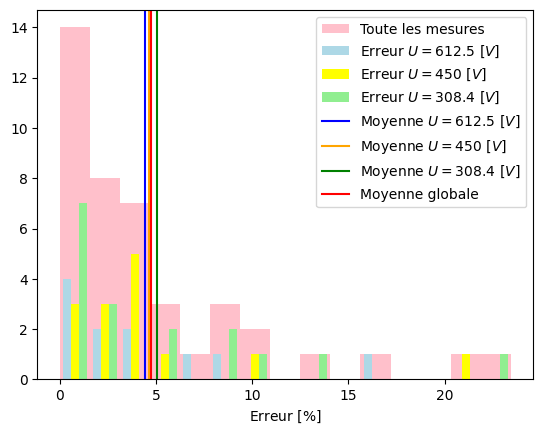

In [7]:
plt.figure()

plt.hist(erreur[0] + erreur[1] + erreur[2], bins=15, label=r"Toute les mesures", color="pink")
plt.hist(erreur, bins=15, label=[r"Erreur $U = 612.5 \ [V]$", r"Erreur $U = 450 \ [V]$", r"Erreur $U = 308.4 \ [V]$"], color=["lightblue", "yellow", "lightgreen"])

plt.axvline(x=erreur_moy[0], color="blue", label=r"Moyenne $U = 612.5 \ [V]$")
plt.axvline(x=erreur_moy[1], color="orange", label=r"Moyenne $U = 450 \ [V]$")
plt.axvline(x=erreur_moy[2], color="green", label=r"Moyenne $U = 308.4 \ [V]$")
plt.axvline(x=erreur_moy[3], color="red", label=r"Moyenne globale")

plt.xlabel(r"Erreur $[\%]$")
plt.legend()

plt.savefig("erreur-hist.pdf")
plt.show()

# Impression des tableaux

In [17]:
def out_line(nom, ligne, arondis):
    print(nom)
    for i in ligne:
        print(np.round(i, arondis), end=" & \n")
    print("\n")

print("Mesure U")
for j in range(len(tension_m)):
    out_line(tension_borne[j], tension_m[j], 2)

print("Mesure X")
for j in range(len(distance_m)):
    out_line(tension_borne[j], distance_m[j], 1)

print("U théorique")
for j in range(len(tension_th)):
    out_line(tension_borne[j], tension_th[j], 2)

print("Erreur")
for j in range(len(erreur)):
    out_line(tension_borne[j], erreur[j], 2)

print("Erreur moyenne")
print(np.round(erreur_moy, 2))

Mesure U
612.5
-79.3 & 
-65.9 & 
-50.08 & 
-34.63 & 
-18.12 & 
0 & 
19.6 & 
35.9 & 
52.3 & 
69 & 
75.2 & 


450
-78 & 
-70 & 
-58.7 & 
-48 & 
-37.15 & 
-25.15 & 
-12.16 & 
0 & 
14.9 & 
27.15 & 
38.55 & 
50.78 & 
63.6 & 
75.2 & 


308.4
-61.9 & 
-53.63 & 
-47.67 & 
-41.55 & 
-32.84 & 
-25.18 & 
-17.2 & 
-8.28 & 
0 & 
10.4 & 
19.12 & 
27.65 & 
35.79 & 
42.6 & 
50.62 & 
59.32 & 
66.9 & 


Mesure X
612.5
-2.4 & 
-2 & 
-1.5 & 
-1 & 
-0.5 & 
0 & 
0.5 & 
1 & 
1.5 & 
2 & 
2.2 & 


450
-3.3 & 
-3 & 
-2.5 & 
-2 & 
-1.5 & 
-1 & 
-0.5 & 
0 & 
0.5 & 
1 & 
1.5 & 
2 & 
2.5 & 
3 & 


308.4
-4 & 
-3.5 & 
-3 & 
-2.5 & 
-2 & 
-1.5 & 
-1 & 
-0.5 & 
0 & 
0.5 & 
1 & 
1.5 & 
2 & 
2.5 & 
3 & 
3.5 & 
4 & 


U théorique
612.5
-80.32 & 
-66.93 & 
-50.2 & 
-33.46 & 
-16.73 & 
0.0 & 
16.73 & 
33.46 & 
50.2 & 
66.93 & 
73.62 & 


450
-81.13 & 
-73.76 & 
-61.47 & 
-49.17 & 
-36.88 & 
-24.59 & 
-12.29 & 
0.0 & 
12.29 & 
24.59 & 
36.88 & 
49.17 & 
61.47 & 
73.76 & 


308.4
-67.4 & 
-58.97 & 
-50.55 & 
-42.12 & 
-33.7 